In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from because.probability import prob

from because.synth import read_data
from because.visualization import viz

r = read_data.Reader('/home/arun/HPCC-covid19/LLCP/llcpA.csv')
ds = r.read()

ps = prob.ProbSpace(ds)

getData:  279922 records read.


# Hypothesis Question

1. **What are all the factors that influence the likelihood of a person having diabetes?**

Interesting variables: Diabetes, Age, Weight, Height, BMI, Income, Employment, Physical Activity

In [3]:
target = ('diabetes','yes')
dby = round( ps.P(target), 2)
dby

0.14

# Step 1: Single Variable Distribution

Viz.show: Target =  [('diabetes',), ('age',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['diabetes', 'age']


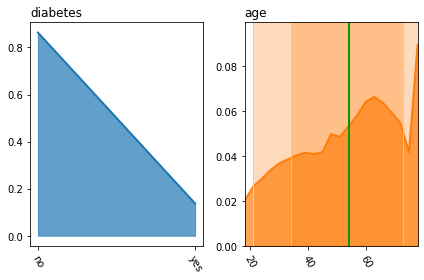

Viz.show: Target =  [('height',), ('weight',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['height', 'weight']


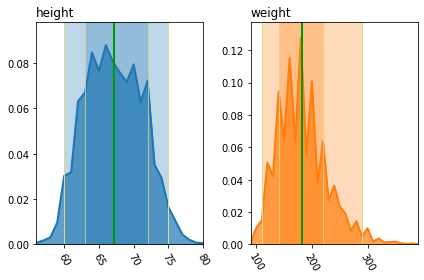

Viz.show: Target =  [('bmi',), ('income',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['bmi', 'income']


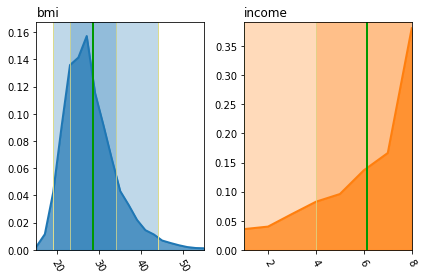

Viz.show: Target =  [('employment',), ('physicalactivity',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['employment', 'physicalactivity']


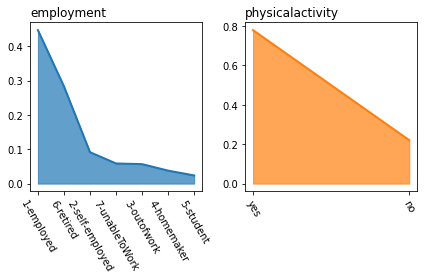

In [66]:
%matplotlib inline
viz.show(probspace=ps, targetSpec=[('diabetes'),('age')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('height'),('weight')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('bmi'), ('income')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('employment'), ('physicalactivity')], condSpec=[], gtype='multi')


In [4]:
varlist1 = ['diabetes', 'income', 'employment', 'physicalactivity', 'bmicat']

for i in varlist1:
    tempVals = ps.getValues(i)
    for j in tempVals:
        print('{:<18} {:<22} {:<5}'.format(i, j, round(ps.P([(i, j)]), 2)))

diabetes           no                     0.86 
diabetes           yes                    0.14 
income             1.0                    0.04 
income             2.0                    0.04 
income             3.0                    0.06 
income             4.0                    0.08 
income             5.0                    0.1  
income             6.0                    0.14 
income             7.0                    0.17 
income             8.0                    0.38 
employment         1-employed             0.45 
employment         2-self-employed        0.09 
employment         3-outofwork            0.06 
employment         4-homemaker            0.04 
employment         5-student              0.02 
employment         6-retired              0.28 
employment         7-unableToWork         0.06 
physicalactivity   no                     0.22 
physicalactivity   yes                    0.78 
bmicat             1-underweight          0.01 
bmicat             2-normal             

In [5]:
goodVars = ['diabetes', 'age', 'height', 'weight', 'bmi', 'bmicat', 'income', 'employment', 'physicalactivity']

for i in goodVars:
    print("Expected Values of", i, "=", ps.E([i]))

Expected Values of diabetes = no
Expected Values of age = 54.12109087531527
Expected Values of height = 67.17642414672659
Expected Values of weight = 183.04577703788914
Expected Values of bmi = 28.400268646265747
Expected Values of bmicat = 3-overweight
Expected Values of income = 6.142971970763284
Expected Values of employment = 1-employed
Expected Values of physicalactivity = yes


### Observations : 

From the survey, 

* Around 86% of the surveyed people have no diabetes 

* Around 53% of the people are in the age between 55 and above in ageGroup (5,6)

* 1/3rd of surveyed people are overweight in nature. (around 36%)

* Around 45% of the people in participated in survey are employed.

* 38% of the surveyed people have income over 75000 per annum. (around 38%)


In [6]:
# typical example of extremely obese 
print("1,", ps.P([('bmicat', '5-extremely obese')], [('height', None, 65), ('weight', 275, None)])) #1.0

print("2,", ps.E([('height')], [('bmicat', '1-underweight'), ('weight', None, 130)])) # 65.85

print("3,", ps.E([('weight')], [('bmicat', '1-underweight'), ('height', None, 65)])) # 95

print("4,", ps.P([('bmicat', '1-underweight')], [('height', None, 70), ('weight', None, 90)])) #0.94

print("5,", ps.E([('height')], [('bmicat', '5-extremely obese')])) #66

print("6,", ps.E([('weight')], [('bmicat', '5-extremely obese')])) #278

print("7,", ps.E(['weight'], [('bmicat', '5-extremely obese'), ('height', 80, None)])) #420

print("8,", ps.P([('bmicat', '5-extremely obese')], [('height', 80, None), ('weight', 400, None)])) #1.0

1, 1.0
2, 65.82181081862888
3, 95.02347417840376
4, 0.9405940594059405
5, 66.38698456868201
6, 278.5650139134834
7, 423.57142857142856
8, 1.0


# Step 2: Pairwise relationship of variables with Diabetes

In [7]:
condList = ['age', 'height', 'weight', 'bmi', 'bmicat', 'income', 'employment', 'physicalactivity']
varlist1 = ['diabetes', 'income', 'employment', 'physicalactivity', 'ageGroup', 'bmicat']

print(f"condVar,\tj,\t P(diabetes = yes | condVar=j), P(diabetes = yes), diff(conditioned - orignial)")
print()

db_yes = round(ps.P([('diabetes', 'yes')]), 2)

for i in condList:
    # print("Expected Values of", i, "=", ps.E(['diabetes'], ['age']))
    if i in varlist1:
        for j in ps.getValues(i):
            tempProb = round(ps.P([('diabetes', 'yes')], [(i, j)], power=1), 2)
            print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format(i, j, tempProb, db_yes, round(tempProb-db_yes, 2)))
    else:
        tempProb = round(ps.P([('diabetes', 'yes')], [i], power=1), 2)
        print('{:<39} {:>8}  {:>8}  {:>12}'.format(i, tempProb, db_yes, round(tempProb-db_yes, 2)))

condVar,	j,	 P(diabetes = yes | condVar=j), P(diabetes = yes), diff(conditioned - orignial)

age                                         0.14      0.14           0.0
height                                      0.14      0.14           0.0
weight                                      0.14      0.14           0.0
bmi                                         0.14      0.14           0.0
bmicat              1-underweight           0.06      0.14         -0.08
bmicat              2-normal                0.06      0.14         -0.08
bmicat              3-overweight            0.11      0.14         -0.03
bmicat              4-obese                  0.2      0.14          0.06
bmicat              5-extremely obese        0.3      0.14          0.16
income              1.0                      0.2      0.14          0.06
income              2.0                     0.24      0.14           0.1
income              3.0                     0.21      0.14          0.07
income              4.0        

### Observations :

1. Students are lesser prone to diabetes, while the retired people and those who are unable to work are having higher chances of diabetes.

2. The difference between the people who have diabetes and those who does not have diabetes is 12%.

3. The probability of a person having diabetes given that he is not doing physical activity is 0.23. 

## Diabetes vs Gender

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('gender',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


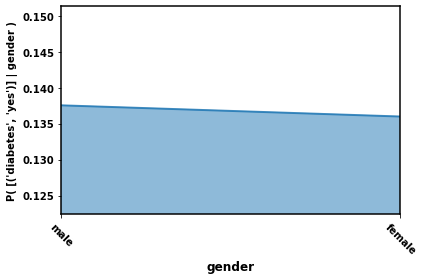

db_yes|male 0.13755172516447858
db_yes|female 0.13599389933909506


In [96]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['gender'], gtype='pdf')

print("db_yes|male", ps.P([('diabetes', 'yes')], [('gender', 'male')]))
print("db_yes|female",ps.P([('diabetes', 'yes')], [('gender', 'female')]))

### Observations:

* Males have 13.7% while females have 13.6% chance of diabetes.


## Diabetes vs Age

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


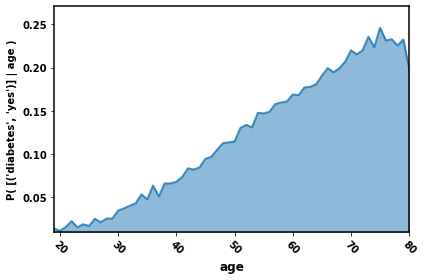

In [67]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['age'], gtype='pdf')

### Observations : 

* Diabetes and Age are positively correlated.

* Probability of diabetes increases with the age. 

## Diabetes vs Weight

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  6.644


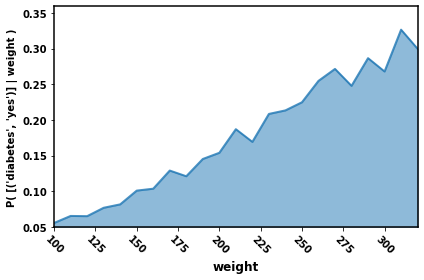

In [4]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['weight'], gtype='pdf')

### Observations : 

* Diabetes and Weight are positively correlated.

* As weight increases, the probability of diabetes increases.

## Diabetes vs Height

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


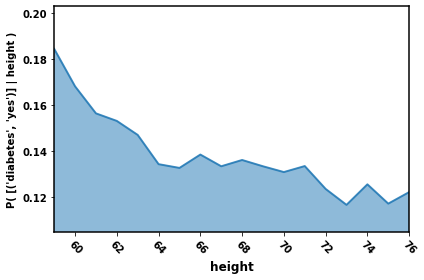

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  10
Viz.show: Controlling for  ['bmi']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  12.747


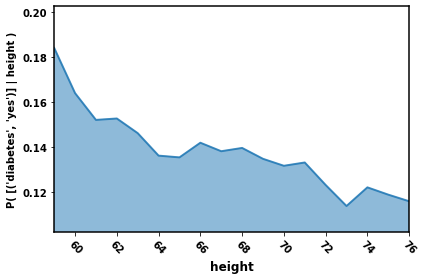

In [324]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['height'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['height'], controlFor=['bmi'], power=10, gtype='pdf')

### Observations : 

* As height increased, there seems to be a decrease in the probability of diabetes.

## Diabetes vs BMI

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


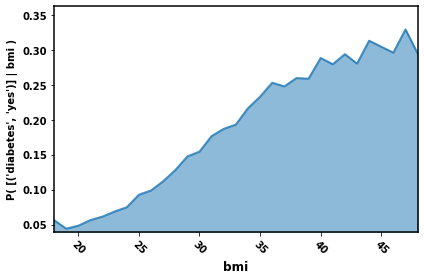

In [70]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['bmi'], gtype='pdf')

### Observations :

* Diabetes and BMI are positively correlated.

* As BMI increases, the probability of diabetes increases.

## Diabetes vs Income

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  3.772


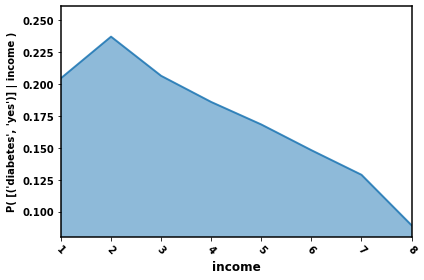

In [5]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['income'], gtype='pdf')

### Observations :

* Diabetes and Income are negatively correlated.

* As income increases, the probability of diabetes increases.

* the directionality of the relation is not clear.

most reasonable explaination could be, as higher income can have access to better diabetes testing & cures.

## Diabetes vs Employment

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


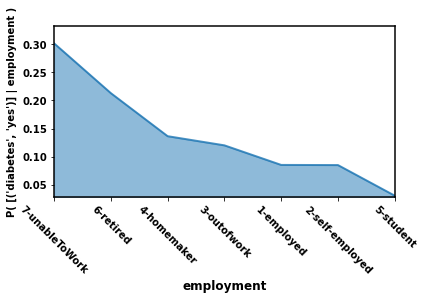

employment          1-employed              0.09      0.14         -0.05
employment          2-self-employed         0.08      0.14         -0.06
employment          3-outofwork             0.12      0.14         -0.02
employment          4-homemaker             0.14      0.14           0.0
employment          5-student               0.03      0.14         -0.11
employment          6-retired               0.21      0.14          0.07
employment          7-unableToWork           0.3      0.14          0.16


In [72]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['employment'], gtype='pdf')

for i in ps.getValues('employment'):
    dby_employment = round(ps.P(target, [('employment', i)]), 2)
    print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format('employment', i, dby_employment, round(dby, 2), round(dby_employment-dby ,2)))

### Observations :

* Students have lesser prone to diabetes, while the retired people and those who are unable to work are having higher chances of diabetes.

* People who are not able to work are having 16% higher chances of diabetes.

* 21% of retired people are having diabetes.

## Diabetes vs Physical Activity

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('physicalactivity',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


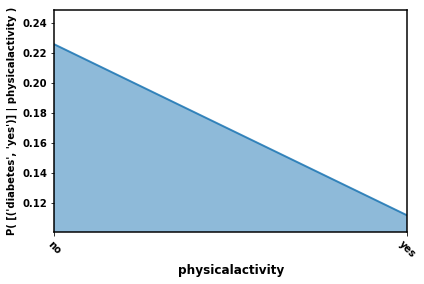

physicalactivity    no                      0.23      0.14          0.09
physicalactivity    yes                     0.11      0.14         -0.03


In [76]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['physicalactivity'], gtype='pdf')

dby = round(ps.P(target), 2)

for i in ps.getValues('physicalactivity'):
    dby_physicalactivity = round(ps.P(target, [('physicalactivity', i)]), 2)
    print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format('physicalactivity', i, dby_physicalactivity, dby, round(dby_physicalactivity-dby, 2)))

### Observations :

* 23% of the people who are not doing any physical activities are having diabetes which is 12% more than the people who are doing physical activities.

* The probability of diabetes decreased by 3% when people are doing physical activities.

## Diabetes vs BMI Category

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmicat',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


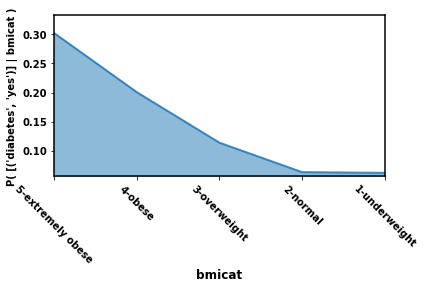

bmicat              1-underweight           0.06      0.14         -0.08
bmicat              2-normal                0.06      0.14         -0.08
bmicat              3-overweight            0.11      0.14         -0.03
bmicat              4-obese                  0.2      0.14          0.06
bmicat              5-extremely obese        0.3      0.14          0.16


In [75]:
%matplotlib inline
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['bmicat'], gtype='pdf')

dby = round(ps.P(target), 2)

for i in ps.getValues('bmicat'):
    dby_bmicat = round(ps.P(target, [('bmicat', i)]), 2)
    print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format('bmicat', i, dby_bmicat, dby, round(dby_bmicat-dby, 2)))

### Observations:

* 30% of extremely obese  and 20% of obese people are having diabetes.

# Step 3: Effect of diabetes on variables 

In [84]:
print("var \t\t ps.E(var) \t\tps.E(var | db=yes) \tdiff \t\t ps.E(var|db=no) \t\t diff\n")

for i in ['age', 'height', 'weight', 'bmi', 'income']:
    e_i = round(ps.E(i), 2)
    e_i_dby =  round(ps.E(i, [('diabetes', 'yes')]), 2)
    e_i_dbn =  round(ps.E(i, [('diabetes', 'no')]), 2)
    print('{:<18} {:<20} {:<20} {:<10} {:20} {:24}'.format(i, e_i, e_i_dby, round(e_i - e_i_dby, 2), e_i_dbn, round(e_i - e_i_dbn, 2)))

for i in ['employment', 'physicalactivity', 'bmicat']:
    e_i = ps.E(i)
    e_i_dby =  ps.E(i, [('diabetes', 'yes')])
    e_i_dbn =  ps.E(i, [('diabetes', 'no')])
    print('{:<18} {:<20} {:46} {:<10}'.format(i, e_i, e_i_dby, e_i_dbn))

var 		 ps.E(var) 		ps.E(var | db=yes) 	diff 		 ps.E(var|db=no) 		 diff

age                54.12                62.86                -8.74                     52.74                     1.38
height             67.18                66.85                0.33                      67.23                    -0.05
weight             183.05               201.19               -18.14                   180.17                     2.88
bmi                28.4                 31.55                -3.15                      27.9                      0.5
income             6.14                 5.49                 0.65                       6.25                    -0.11
employment         1-employed           6-retired                                      1-employed
physicalactivity   yes                  yes                                            yes       
bmicat             3-overweight         4-obese                                        3-overweight


### Observations :

* Expected Age of the people with diabetes is 63 and for those without diabetes, it is 53.

* The height difference between the people with diabetes and without diabetes is not significant. (0.38 inches)

* People with diabetes weigh 22 pounds more than those without diabetes.

* People with diabetes have higher BMI of 3.7 more than the people without diabetes.

* The difference between the average income of all people and that of average income of people with diabetes is quite significant.(0.7)

* Most of the people with the diabetes are retired people, while employees cover most of surveyed people, it is that category of people where diabetes is not expected much.

# Step 4: Analyzing Intermediary variables

## Age vs Height

Can 'AGE' cause 'HEIGHT'?

Age starts from 18 in the dataset, and that is the usual age where the height stops growing.

Viz.show: Target =  [('height',)] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  34.374


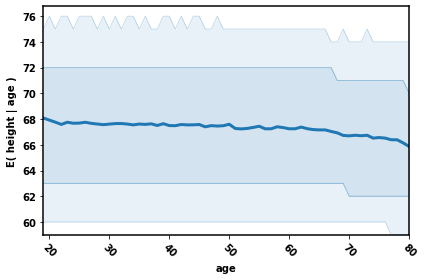

In [160]:
%matplotlib inline
viz.show(probspace=ps, targetSpec=['height'], condSpec=['age'], gtype='exp')

## Age vs Weight

Age causes weight.

As the age increased, the weight started to increase, and after reaching the mid-age, it reached the max weight and after that it started decreasing.

Viz.show: Target =  [('weight',)] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  28.572


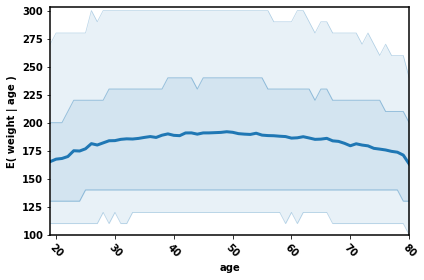

In [159]:
%matplotlib inline
viz.show(probspace=ps, targetSpec=['weight'], condSpec=['age'], gtype='exp')

## Age vs BMI

Age causes BMI, maybe indirectly, via weight and height

Viz.show: Target =  [('bmi',)] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  14.243


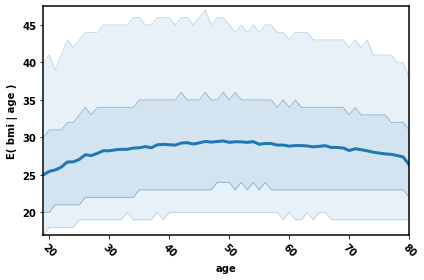

Viz.show: Target =  [('bmi',)] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Viz.show: Controlling for  ['height', 'weight']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  17.506


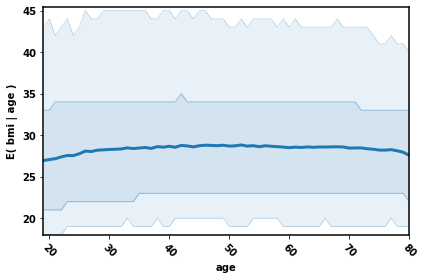

In [158]:
%matplotlib inline
viz.show(probspace=ps, targetSpec=['bmi'], condSpec=['age'], gtype='exp')
viz.show(probspace=ps, targetSpec=['bmi'], condSpec=['age'], controlFor=['height', 'weight'], gtype='exp')

## Age vs Employment

Types of employment depends age. 

Different age levels implying that different types of employment.

Viz.show: Target =  [('age',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  5.051


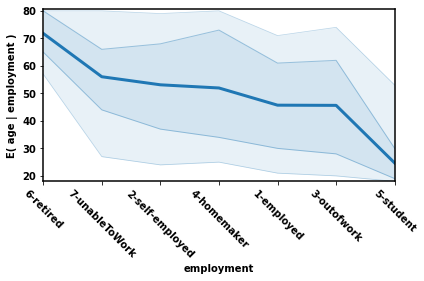

In [133]:
%matplotlib inline
viz.show(probspace=ps, targetSpec=['age'], condSpec=['employment'], gtype='exp')

## Age vs Physical Activity

Age causes Physical Activity. 

Viz.show: Target =  [('age',)] , Condition =  [('physicalactivity',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  2.466


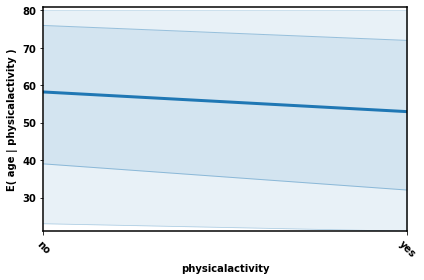

52.96080246772116
58.22098955381003
52.376383489276215
53.528633007708365
57.66278030246592
58.650391128685634


In [310]:
%matplotlib inline
viz.show(probspace=ps, targetSpec=['age'], condSpec=['physicalactivity'], gtype='exp')

print(ps.E(['age'], [('physicalactivity', 'yes')]))
print(ps.E(['age'], [('physicalactivity', 'no')]))

print(ps.E(['age'], [('physicalactivity', 'yes'), ('gender', 'male')]))
print(ps.E(['age'], [('physicalactivity', 'yes'), ('gender', 'female')]))

print(ps.E(['age'], [('physicalactivity', 'no'), ('gender', 'male')]))
print(ps.E(['age'], [('physicalactivity', 'no'), ('gender', 'female')]))


## Age vs Income

Age and Income are correlated.

Middle-aged people are having higher income than young people. Retired people are having lesser income.

Viz.show: Target =  [('income',)] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  28.373


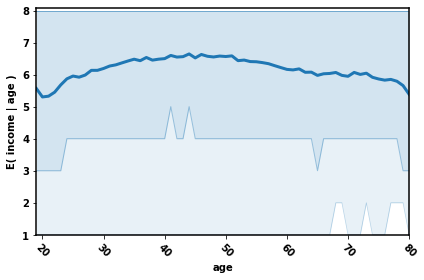

In [6]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['age'], gtype='exp')

## Age vs Gender

Can Gender cause Age? Can Age cause Gender?

Practically, they should be independent.

In [415]:
print(ps.E(['age'], [('gender', 'male')]))
print(ps.E(['age'], [('gender', 'female')]))
print(ps.dependence('age', 'gender'), ",", ps.isIndependent('age', 'gender'))
print(ps.testDirection('age', 'gender')) #Gender causes age, but how?

53.43260843678366
54.75662622459775
1.0000000000001685 , False
0.00027532058006744955


## Height vs Weight

As the height increased, weight also increases. Implying that height causes weight.

Viz.show: Target =  [('weight',)] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  5.354


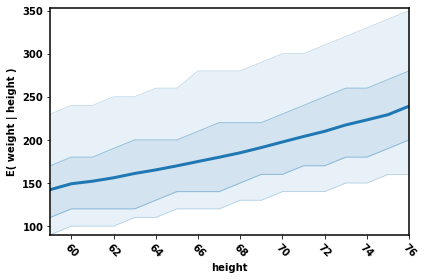

In [312]:
viz.show(probspace=ps, targetSpec=['weight'], condSpec=['height'], gtype='exp')

## Height vs BMI

Height should cause BMI, as BMI is inversley related to square of height. [calculated using height]

But no such correlations are found.

-8.738899927791099e-05 False
Viz.show: Target =  [('bmi',)] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  5.417


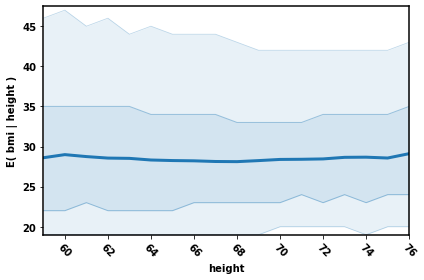

Viz.show: Target =  [('height',)] , Condition =  [('bmi',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  8.914


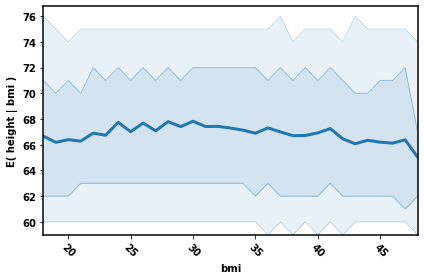

In [313]:
var = ('height', 'bmi') 
print(ps.testDirection(var[0], var[1]), ps.isIndependent(var[0], var[1])) 
#the direction is not observed between height and BMI.

viz.show(probspace=ps, targetSpec=['bmi'], condSpec=['height'], gtype='exp')
viz.show(probspace=ps, targetSpec=['height'], condSpec=['bmi'], gtype='exp')

## Height vs Income

As height increased, income also increased. 

so Height can cause Income.

Viz.show: Target =  [('income',)] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  6.006


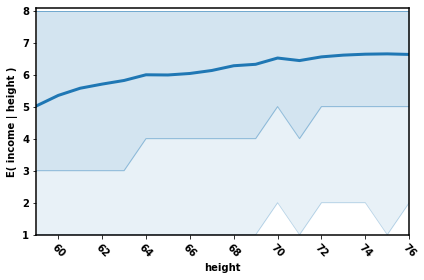

Viz.show: Target =  [('income',)] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  10
Viz.show: Controlling for  ['bmi']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  23.015


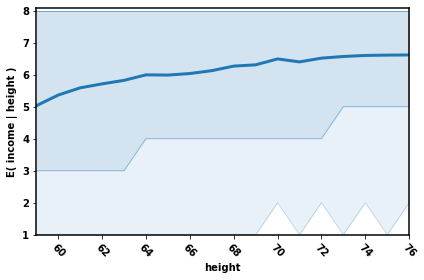

In [318]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['height'], gtype='exp')
viz.show(probspace=ps, targetSpec=['income'], condSpec=['height'], controlFor=['bmi'], power=10, gtype='exp')

## Height vs Employment

From the graph it can be observed as height causes employment.

Viz.show: Target =  [('height',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  4.035


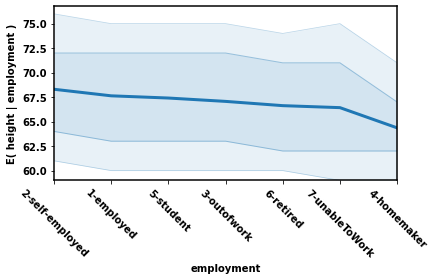

In [329]:
viz.show(probspace=ps, targetSpec=['height'], condSpec=['employment'], gtype='exp')

## Height vs Physical Activity

The difference is not significant enough to conclude that there is a causal relation.

In [290]:
print(ps.E(['height'], [('physicalactivity', 'yes')]))
print(ps.E(['height'], [('physicalactivity', 'no')]))

67.36442429770324
66.51212243906389


## Height vs Gender

Gender can cause height. and difference is also significant.

In [291]:
print(ps.E(['height'], [('gender', 'male')]))
print(ps.E(['height'], [('gender', 'female')]))

70.23018814563424
64.35750697316534


## Weight vs Gender

Gender causes weight also.

In [293]:
print(ps.E(['weight'], [('gender', 'male')]))
print(ps.E(['weight'], [('gender', 'female')]))

200.65791432228872
166.7880844749172


## Weight vs BMI

As BMI is calculated from weight, can it be safely assumed that weight is causing BMI?

Viz.show: Target =  [('bmi',)] , Condition =  [('weight',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  12.323


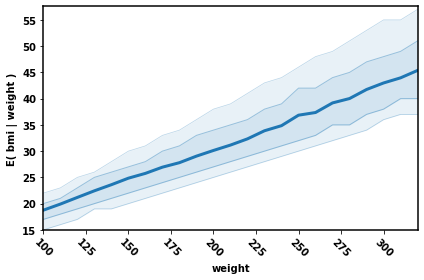

Viz.show: Target =  [('weight',)] , Condition =  [('bmi',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  15.308


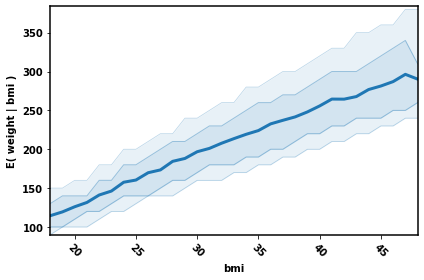

In [295]:
viz.show(probspace=ps, targetSpec=['bmi'], condSpec=['weight'], gtype='exp')
viz.show(probspace=ps, targetSpec=['weight'], condSpec=['bmi'], gtype='exp')

## Weight vs Employment

Does weight causes employment? People choosing jobs based on their weight.

Can Employment causes weight? Jobs, depending on their habits can affect the weight. And this seems more practical.

Employment can cause weight.

Viz.show: Target =  [('weight',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  4.011


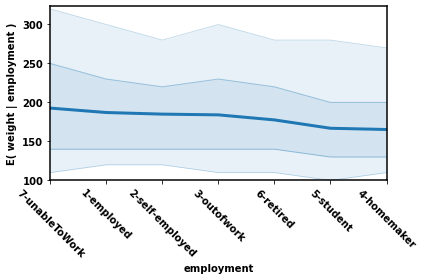

Viz.show: Filtering by:  [('bmicat', '4-obese', '5-extremely obese')]
Viz.show: Filtered N =  100701
Viz.show: Target =  [('weight',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  3.072


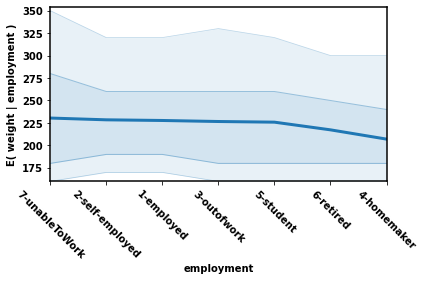

Viz.show: Target =  [('weight',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Viz.show: Controlling for  ['physicalactivity']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  6.697


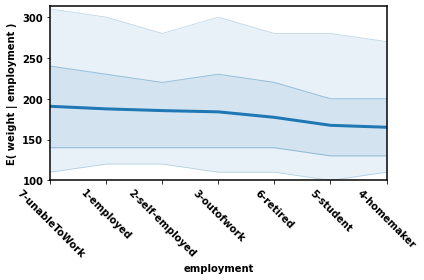

In [424]:
viz.show(probspace=ps, targetSpec=['weight'], condSpec=['employment'], gtype='exp')
viz.show(probspace=ps, targetSpec=['weight'], condSpec=['employment'], 
         filtSpec=[('bmicat', '4-obese', '5-extremely obese')], gtype='exp')
viz.show(probspace=ps, targetSpec=['weight'], condSpec=['employment'], controlFor=['physicalactivity'], gtype='exp')

## Weight vs Income

People with average weight are having higher income than the higher or lower weights.

Weight seems to be causing income, but controlling BMI has effect on that relation.

Viz.show: Target =  [('income',)] , Condition =  [('weight',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  11.432


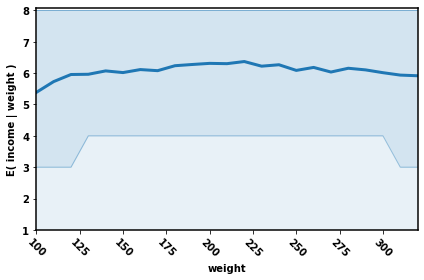

Viz.show: Target =  [('income',)] , Condition =  [('weight',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  10
Viz.show: Controlling for  ['bmi']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  33.062


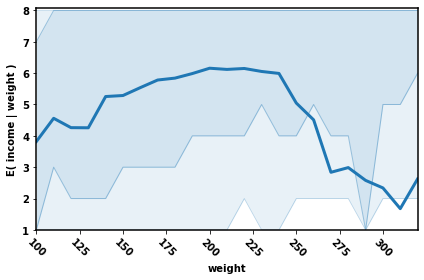

In [7]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['weight'], gtype='exp')
viz.show(probspace=ps, targetSpec=['income'], condSpec=['weight'], controlFor=['bmi'], power=10, gtype='exp')

## Weight vs Physical Activity

Physical activity can cause weight. 

But conditionalizing on BMI, there is no significant effect of physicalactivity on weight.

So, Physical activity can cause weight, but via BMI. [inverted -V structre]

In [321]:
print(ps.E(['weight'], [('physicalactivity', 'yes')]))
print(ps.E(['weight'], [('physicalactivity', 'no')]))
print(ps.E(['weight'], [('physicalactivity', 'yes'),'bmi']))
print(ps.E(['weight'], [('physicalactivity', 'no'), 'bmi']))

180.9234703933045
190.54498339946554
182.8913131598155
183.2607887861678


## BMI vs Physical Activity

Physical activity can cause BMI.

In [322]:
df2 = df2[(df2['sqfeet'] >= 500) & (df2['sqfeet'] <= 3000)]
print(ps.E(['bmi'], [('physicalactivity', 'yes')]))
print(ps.E(['bmi'], [('physicalactivity', 'no')]))
print(ps.E(['bmi'], [('physicalactivity', 'yes'), 'weight']))
print(ps.E(['bmi'], [('physicalactivity', 'no'), 'weight']))

27.895131017476636
30.18518098631468
28.063825062361747
29.488918628366754


## BMI vs Gender

Not much effect of gender on BMI. 

In [333]:
print(ps.E(['bmi'], [('gender', 'male')]))
print(ps.E(['bmi'], [('gender', 'female')]))

28.541380131582866
28.270009205952267


## BMI vs Income

It seems BMI is causing Income.

But controlling for weight has some effect on that relation.

Viz.show: Target =  [('income',)] , Condition =  [('bmi',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  15.398


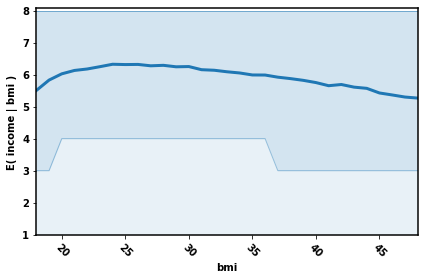

Viz.show: Target =  [('income',)] , Condition =  [('bmi',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  10
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  15.42


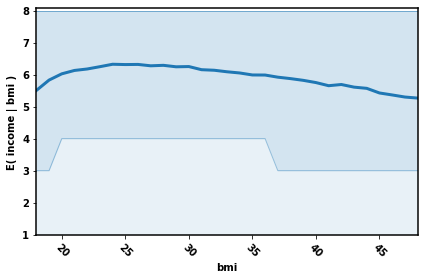

In [8]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['bmi'], gtype='exp')
viz.show(probspace=ps, targetSpec=['income'], condSpec=['bmi'], power=10, gtype='exp')


## BMI vs Employment

As weight is causing employment. The effect of BMI on employment is indirect. [observed from controlling on weight]

Viz.show: Target =  [('bmi',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  4.272


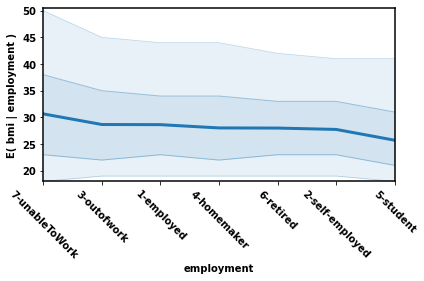

Viz.show: Target =  [('bmi',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Viz.show: Controlling for  ['height']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  6.607


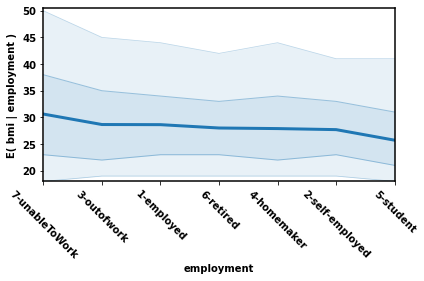

Viz.show: Target =  [('bmi',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Viz.show: Controlling for  ['weight']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  7.117


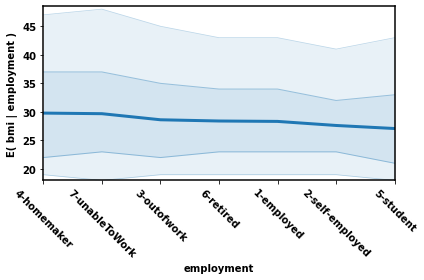

Viz.show: Target =  [('bmi',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Viz.show: Controlling for  ['weight', 'height']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  21.476


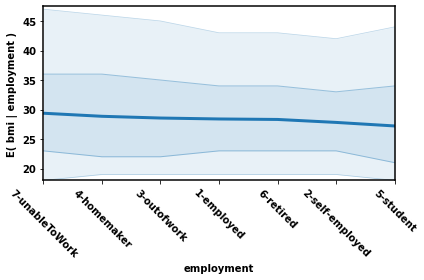

In [428]:
:viz.show(probspace=ps, targetSpec=['bmi'], condSpec=['employment'], gtype='exp')
viz.show(probspace=ps, targetSpec=['bmi'], condSpec=['employment'], controlFor=['height'], gtype='exp')
viz.show(probspace=ps, targetSpec=['bmi'], condSpec=['employment'], controlFor=['weight'], gtype='exp')
viz.show(probspace=ps, targetSpec=['bmi'], condSpec=['employment'], controlFor=['weight', 'height'], gtype='exp')

## Income vs Physical Activity

Can income cause Physical activity? As having higher income implying higher work and lesser physical activity?

or physical activity causing income? As physical active implying good health, in turn higher income?

But from the values below, it is contradicting the income causing physical activity assumption.

So physical activity can cause income.

In [346]:
print(ps.E(['income'], [('physicalactivity', 'yes')]))
print(ps.E(['income'], [('physicalactivity', 'no')]))

6.397154603830835
5.244813345210138


## Income vs Gender

Gender is causing the income.

In [347]:
print(ps.E(['income'], [('gender', 'male')]))
print(ps.E(['income'], [('gender', 'female')]))

6.3708508231371495
5.932617925500487


## Income vs Employment

Employment causes income.

Viz.show: Target =  [('income',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  8.313


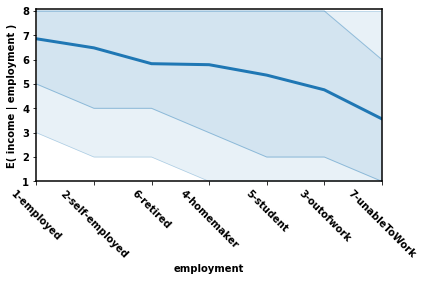

In [430]:
df2 = df2[(df2['sqfeet'] >= 500) & (df2['sqfeet'] <= 3000)]
viz.show(probspace=ps, targetSpec=['income'], condSpec=['employment'], gtype='exp')

## Physical Activity vs Gender

Gender can cause Physical Activity

In [401]:
print(ps.E(['physicalactivity'], [('gender', 'male')])) #yes
print(ps.E(['physicalactivity'], [('gender', 'female')])) #yes

print(ps.P([('physicalactivity', 'yes')], [('gender', 'male')])) #0.80
print(ps.P([('physicalactivity', 'yes')], [('gender', 'female')])) #0.76

yes
yes
0.8001994581882051
0.7602399043680182


## Physical Activity vs Employment

Employment causes physical activity.

Viz.show: Target =  [('physicalactivity', 'yes')] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  5.911


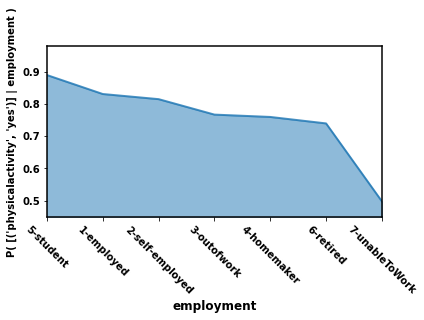

In [406]:
viz.show(probspace=ps, targetSpec=[('physicalactivity', 'yes')], condSpec=['employment'], gtype='pdf')

## Gender vs Employment

Gender causes employment.

Viz.show: Target =  [('gender', 'male')] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


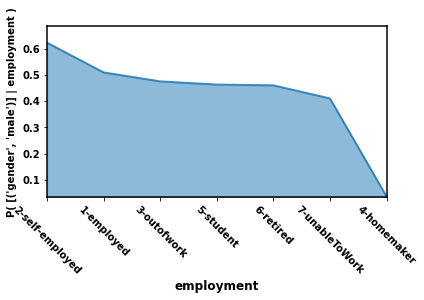

Viz.show: Target =  [('gender', 'female')] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


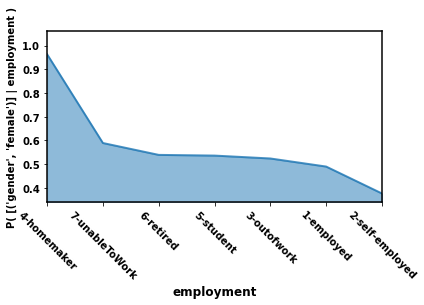

In [414]:
viz.show(probspace=ps, targetSpec=[('gender', 'male')], condSpec=['employment'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('gender', 'female')], condSpec=['employment'], gtype='pdf')

# Step 5: Conditionalization on variables

In [17]:
# Master table with All pairwise combinations of variables and their conditional probabilities with respect to diabetes
# It is masterTable without bmicat

table = []

list1 = ['age', 'height', 'weight', 'bmi']
list2 = ['income', 'employment', 'physicalactivity']
list3 = list1+list2

for i in range(len(list1)):
    for j in range(i, len(list3)):
        if list3[j] in list2:
            for k in ps.getValues(list3[j]):
                u = round(ps.P(target, [list1[i]]), 2)
                v = round(ps.P(target, [(list3[j], k)]), 2)
                w = round(ps.P(target, [list1[i],(list3[j], k)]), 2)

                table.append([list1[i], list3[j], k, u, v, w, dby, round(u-dby, 2), round(w-dby, 2), round(w-u, 2)])

        elif list1[i] != list3[j]:
            u = round(ps.P(target, [list1[i]]), 2)
            v = round(ps.P(target, [list3[j]]), 2)
            w = round(ps.P(target, [list1[i],list3[j]]), 2)
            table.append([list1[i], list3[j], " ", u, v, w, dby, round(u-dby, 2), round(w-dby, 2), round(w-u, 2)])

for i in list2:
    for j in ps.getValues(i):
        for k in list2:
            if k != i:
                for l in ps.getValues(k):
                    u = round(ps.P(target, [(i,j)]), 2)
                    v = round(ps.P(target, [(k, l)]), 2)
                    w = round(ps.P(target, [(i,j) ,(k, l)]), 2)
                    table.append([str(i)+str(j), k, l, u, v, w, dby, round(u-dby, 2), round(w-dby, 2), round(w-u, 2)])

df = pd.DataFrame(table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)'])
df.shape 

(246, 10)

In [8]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'bmi'], controlFor=[('height')], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',), ('bmi',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['height']
enhance =  False
nTests =  837


AssertionError: ProbSpace.P: target must be bound (i.e. include a value or value range).  Got [('age', 20.0, 22.0), ('bmi', 19.0, 20.0), ('height',)]

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
enhance =  False
nTests =  248
Test Time =  0.002


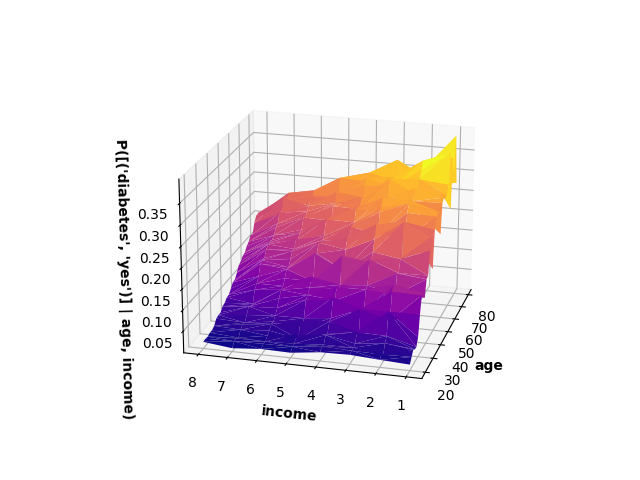

In [12]:
%matplotlib widget
# viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'income'], controlFor=['height'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'income'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',), ('weight',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
enhance =  False
nTests =  620
Test Time =  26.619


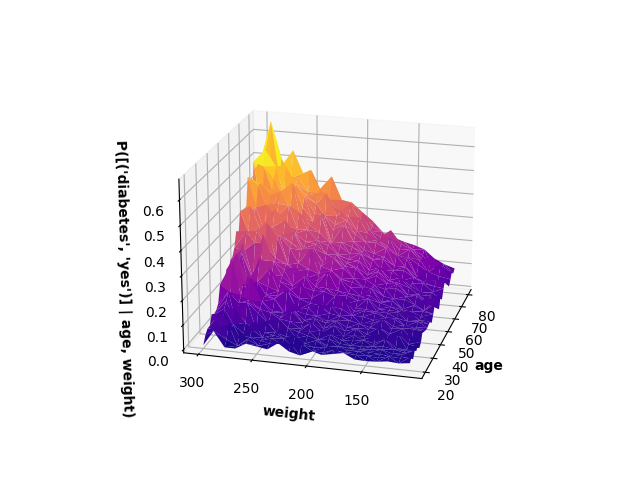

In [13]:
%matplotlib widget
# viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'weight'], controlFor=['height'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'weight'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',), ('height',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['weight']
enhance =  False
nTests =  496
Test Time =  222.297


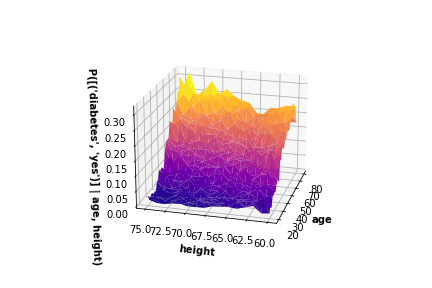

In [498]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'height'], controlFor=['weight'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
enhance =  False
nTests =  216
Test Time =  96.832


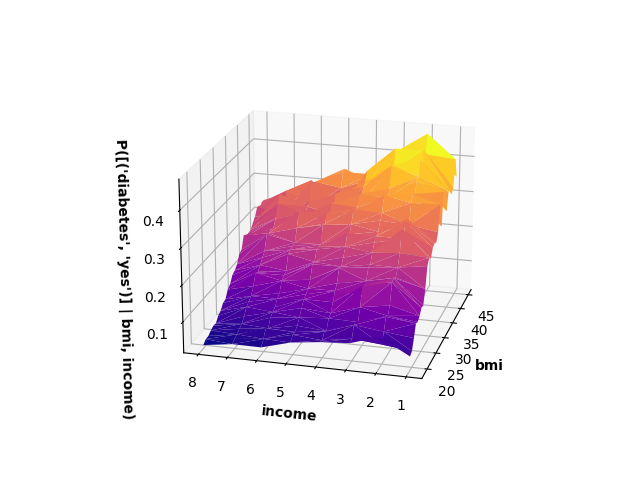

In [14]:
%matplotlib widget
# viz.show(probspace=ps, targetSpec=[(target)], condSpec=['bmi', 'income'], controlFor=['height', 'weight', 'age'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['bmi', 'income'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['bmi', 'weight', 'age']
enhance =  False
nTests =  128
Test Time =  0.001


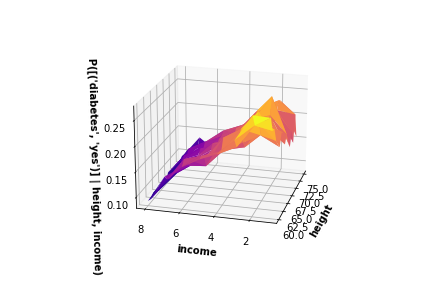

In [499]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'income'], controlFor=['bmi', 'weight', 'age'], gtype='pdf')

## Conditionalized on Age

In [85]:
age_table = []

u = round(ps.P(target, ['age']), 2) #var1
for i in ['employment', 'physicalactivity', 'bmicat']:
    for j in ps.getValues(i):
        v = round(ps.P(target, [(i, j)]), 2) #var2
        w = round(ps.P(target, ['age', (i, j)]), 2) #var1, var2
        age_table.append(['age', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_age = pd.DataFrame(age_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_age


var1              var2            var2Val  P(db=yes|var1)  P(db=yes|var2)  \
0   age        employment         1-employed            0.14            0.09   
1   age        employment    2-self-employed            0.14            0.08   
2   age        employment        3-outofwork            0.14            0.12   
3   age        employment        4-homemaker            0.14            0.14   
4   age        employment          5-student            0.14            0.03   
5   age        employment          6-retired            0.14            0.21   
6   age        employment     7-unableToWork            0.14            0.30   
7   age  physicalactivity                 no            0.14            0.23   
8   age  physicalactivity                yes            0.14            0.11   
9   age            bmicat      1-underweight            0.14            0.06   
10  age            bmicat           2-normal            0.14            0.06   
11  age            bmicat       3-overweight            0.14            0.11   
12  age            bmicat            4-obese            0.14            0.20   
13  age            bmicat  5-extremely obese            0.14            0.30   

    P(db=yes|var1,var2)  P(db=yes)  diff:db(var1)-dby  diff:db(var2)-dby  \
0                  0.09       0.14                0.0              -0.05   
1                  0.08       0.14                0.0              -0.06   
2                  0.14       0.14                0.0              -0.02   
3                  0.14       0.14                0.0               0.00   
4                  0.13       0.14                0.0              -0.11   
5                  0.18       0.14                0.0               0.07   
6                  0.27       0.14                0.0               0.16   
7                  0.21       0.14                0.0               0.09   
8                  0.11       0.14                0.0              -0.03   
9                  0.07       0.14                0.0              -0.08   
10                 0.07       0.14                0.0              -0.08   
11                 0.11       0.14                0.0              -0.03   
12                 0.19       0.14                0.0               0.06   
13                 0.30       0.14                0.0               0.16   

    diff:db(var1,var2) - dby  diff:db(var1,var2)-db(var1)  \
0                      -0.05                        -0.05   
1                      -0.06                        -0.06   
2                       0.00                         0.00   
3                       0.00                         0.00   
4                      -0.01                        -0.01   
5                       0.04                         0.04   
6                       0.13                         0.13   
7                       0.07                         0.07   
8                      -0.03                        -0.03   
9                      -0.07                        -0.07   
10                     -0.07                        -0.07   
11                     -0.03                        -0.03   
12                      0.05                         0.05   
13                      0.16                         0.16   

    diff:db(var1,var2)-db(var2)  
0                          0.00  
1                          0.00  
2                          0.02  
3                          0.00  
4                          0.10  
5                         -0.03  
6                         -0.03  
7                         -0.02  
8                          0.00  
9                          0.01  
10                         0.01  
11                         0.00  
12                        -0.01  
13                         0.00

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',), ('bmi',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['gender']
enhance =  False
nTests =  837
Test Time =  0.006


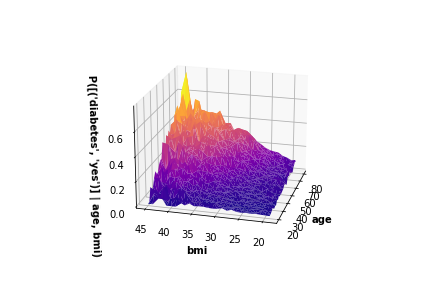

In [500]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'bmi'], controlFor=['gender'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',), ('weight',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['geder']
enhance =  False
nTests =  620
Test Time =  0.019


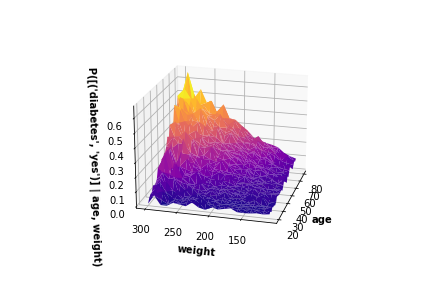

In [503]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'weight'], controlFor=['geder'], gtype='pdf')

### Observations :

* Extremely obese and obese people positively affecting the diabetes probability conditioned on Age.

* Conditionalized on Age, the probability of diabetes increased for people who are not doing any physical activities. (by 4%)

* There is 9% increase in the probability of diabetes for those people who are unable to work, when conditionalized on age.

* Given a particular age, height does not affect the diabetes probability. And for a particular height, probability of diabetes increases with the age.

* For higher income, the rate of increase in the probability of diabetes as age increased, is lesser than the that of the lower income. The increase in the probability of diabetes starts at the age of 30. 

* conditionalized on age, the plot is similar for weight and BMI. This affirms the positive corelation between BMI and Weight.

* Given an age, if weight increases, BMI increases (because of positive corelation between BMI and Weight), the probabiltiy of diabetes also increases.

* Even if a person is having constant weight, the risk of diabetes increases as the age progresses. 

## Conditionalize on Height

In [23]:
height_table = []

u = round(ps.P(target, ['height']), 2) #var1
for i in ['employment', 'physicalactivity', 'bmicat']:
    for j in ps.getValues(i):
        v = round(ps.P(target, [(i, j)]), 2) #var2
        w = round(ps.P(target, ['height', (i, j)]), 2) #var1, var2
        height_table.append(['height', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_height = pd.DataFrame(height_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_height

var1              var2            var2Val  P(db=yes|var1)  \
0   height        employment         1-employed            0.14   
1   height        employment    2-self-employed            0.14   
2   height        employment        3-outofwork            0.14   
3   height        employment        4-homemaker            0.14   
4   height        employment          5-student            0.14   
5   height        employment          6-retired            0.14   
6   height        employment     7-unableToWork            0.14   
7   height  physicalactivity                 no            0.14   
8   height  physicalactivity                yes            0.14   
9   height            bmicat      1-underweight            0.14   
10  height            bmicat           2-normal            0.14   
11  height            bmicat       3-overweight            0.14   
12  height            bmicat            4-obese            0.14   
13  height            bmicat  5-extremely obese            0.14   

    P(db=yes|var2)  P(db=yes|var1,var2)  P(db=yes)  diff:db(var1)-dby  \
0             0.09                 0.09       0.14                0.0   
1             0.08                 0.09       0.14                0.0   
2             0.12                 0.12       0.14                0.0   
3             0.14                 0.13       0.14                0.0   
4             0.03                 0.03       0.14                0.0   
5             0.21                 0.21       0.14                0.0   
6             0.30                 0.30       0.14                0.0   
7             0.23                 0.23       0.14                0.0   
8             0.11                 0.11       0.14                0.0   
9             0.06                 0.06       0.14                0.0   
10            0.06                 0.06       0.14                0.0   
11            0.11                 0.11       0.14                0.0   
12            0.20                 0.20       0.14                0.0   
13            0.30                 0.30       0.14                0.0   

    diff:db(var2)-dby  diff:db(var1,var2) - dby  diff:db(var1,var2)-db(var1)  \
0               -0.05                     -0.05                        -0.05   
1               -0.06                     -0.05                        -0.05   
2               -0.02                     -0.02                        -0.02   
3                0.00                     -0.01                        -0.01   
4               -0.11                     -0.11                        -0.11   
5                0.07                      0.07                         0.07   
6                0.16                      0.16                         0.16   
7                0.09                      0.09                         0.09   
8               -0.03                     -0.03                        -0.03   
9               -0.08                     -0.08                        -0.08   
10              -0.08                     -0.08                        -0.08   
11              -0.03                     -0.03                        -0.03   
12               0.06                      0.06                         0.06   
13               0.16                      0.16                         0.16   

    diff:db(var1,var2)-db(var2)  
0                          0.00  
1                          0.01  
2                          0.00  
3                         -0.01  
4                          0.00  
5                          0.00  
6                          0.00  
7                          0.00  
8                          0.00  
9                          0.00  
10                         0.00  
11                         0.00  
12                         0.00  
13                         0.00

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',), ('employment',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['gender', 'weight', 'bmi', 'physicalactivity']
enhance =  False
nTests =  112
Test Time =  0.001
String Value Mappings:
     employment: 1-employed=1, 2-self-employed=2, 3-outofwork=3, 4-homemaker=4, 5-student=5, 6-retired=6, 7-unableToWork=7



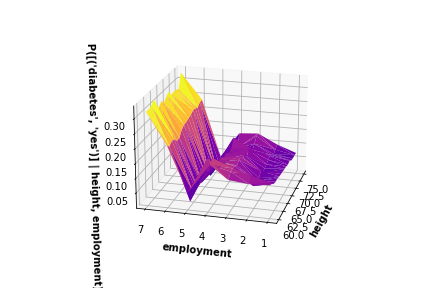

In [484]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'employment'], controlFor=['gender', 'weight', 'bmi', 'physicalactivity'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',), ('employment',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['income', 'weight']
enhance =  False
nTests =  112
Test Time =  0.001
String Value Mappings:
     employment: 1-employed=1, 2-self-employed=2, 3-outofwork=3, 4-homemaker=4, 5-student=5, 6-retired=6, 7-unableToWork=7



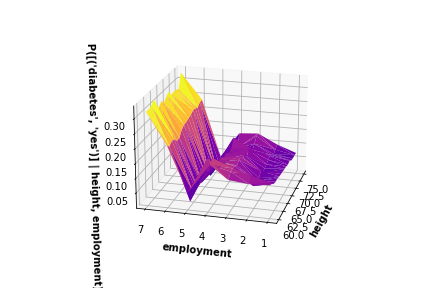

In [504]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'employment'], controlFor=['income', 'weight'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
enhance =  False
nTests =  128
Test Time =  62.911


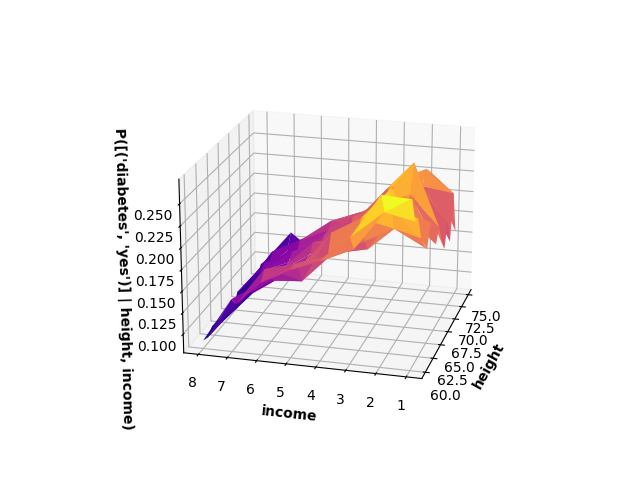

In [15]:
%matplotlib widget
# viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'income'], controlFor=['weight'], gtype='pdf')
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'income'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',), ('bmi',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['physicalactivty']
enhance =  False
nTests =  432
Test Time =  179.856


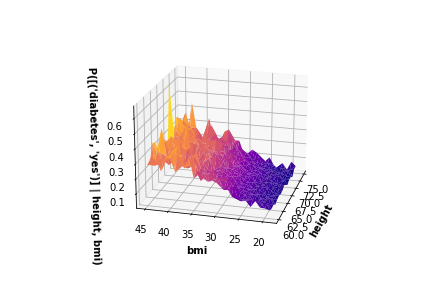

In [505]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'bmi'], controlFor=['physicalactivty'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',), ('bmi',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['gener']
enhance =  False
nTests =  432
Test Time =  0.004


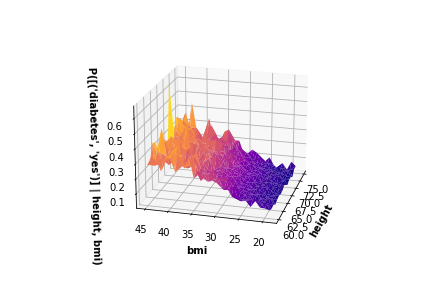

In [514]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'bmi'], controlFor=['gener'], gtype='pdf')

### Observations :

* Conditionalized on Height, the probability of diabetes increased for people who are not doing any physical activities. (by 8%)

* The probability of diabetes increased for retired people(by 10%) and unable to work people (by 16%), when conditionalized on height.

* Extremly obese and obese people have positive effect on the probability of diabetes conditioned on height, while other BMI categories have negative effect.

* Conditionalized on height, as the age increased, probability of diabetes also increased.

* If the height of the person is low (<65) as the weight increased the probability of diabetes escalates quickly. This indicates positive corelation between height and weight.

* Conditionalized on Height, as the income increased, the probability of diabetes decreases. But varying height for a given income, is not affecting the probability of diabetes.

* As BMI increases, for a particular height, the probability of diabetes increases. And the increase in the height should affect the BMI (according to the BMI formula), but from the plot, this relation could not be found.

## Conditionalize on Weight

In [28]:
weight_table = []

u = round(ps.P(target, ['weight']), 2) #var1
for i in ['employment', 'physicalactivity', 'bmicat']:
    for j in ps.getValues(i):
        v = round(ps.P(target, [(i, j)]), 2) #var2
        w = round(ps.P(target, ['weight', (i, j)]), 2) #var1, var2
        weight_table.append(['weight', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_weight = pd.DataFrame(weight_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_weight

var1              var2            var2Val  P(db=yes|var1)  \
0   weight        employment         1-employed            0.14   
1   weight        employment    2-self-employed            0.14   
2   weight        employment        3-outofwork            0.14   
3   weight        employment        4-homemaker            0.14   
4   weight        employment          5-student            0.14   
5   weight        employment          6-retired            0.14   
6   weight        employment     7-unableToWork            0.14   
7   weight  physicalactivity                 no            0.14   
8   weight  physicalactivity                yes            0.14   
9   weight            bmicat      1-underweight            0.14   
10  weight            bmicat           2-normal            0.14   
11  weight            bmicat       3-overweight            0.14   
12  weight            bmicat            4-obese            0.14   
13  weight            bmicat  5-extremely obese            0.14   

    P(db=yes|var2)  P(db=yes|var1,var2)  P(db=yes)  diff:db(var1)-dby  \
0             0.09                 0.08       0.14                0.0   
1             0.08                 0.08       0.14                0.0   
2             0.12                 0.12       0.14                0.0   
3             0.14                 0.15       0.14                0.0   
4             0.03                 0.04       0.14                0.0   
5             0.21                 0.22       0.14                0.0   
6             0.30                 0.29       0.14                0.0   
7             0.23                 0.22       0.14                0.0   
8             0.11                 0.11       0.14                0.0   
9             0.06                 0.04       0.14                0.0   
10            0.06                 0.07       0.14                0.0   
11            0.11                 0.11       0.14                0.0   
12            0.20                 0.20       0.14                0.0   
13            0.30                 0.31       0.14                0.0   

    diff:db(var2)-dby  diff:db(var1,var2) - dby  diff:db(var1,var2)-db(var1)  \
0               -0.05                     -0.06                        -0.06   
1               -0.06                     -0.06                        -0.06   
2               -0.02                     -0.02                        -0.02   
3                0.00                      0.01                         0.01   
4               -0.11                     -0.10                        -0.10   
5                0.07                      0.08                         0.08   
6                0.16                      0.15                         0.15   
7                0.09                      0.08                         0.08   
8               -0.03                     -0.03                        -0.03   
9               -0.08                     -0.10                        -0.10   
10              -0.08                     -0.07                        -0.07   
11              -0.03                     -0.03                        -0.03   
12               0.06                      0.06                         0.06   
13               0.16                      0.17                         0.17   

    diff:db(var1,var2)-db(var2)  
0                         -0.01  
1                          0.00  
2                          0.00  
3                          0.01  
4                          0.01  
5                          0.01  
6                         -0.01  
7                         -0.01  
8                          0.00  
9                         -0.02  
10                         0.01  
11                         0.00  
12                         0.00  
13                         0.01

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',), ('age',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['weight']
enhance =  False
nTests =  620
Test Time =  276.006


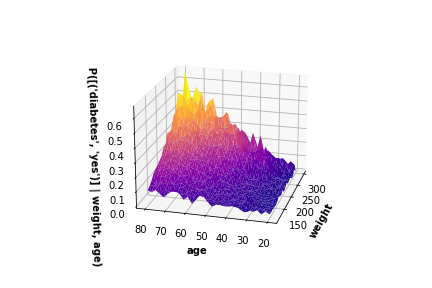

In [29]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['weight', 'age'], controlFor=['weight'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',), ('height',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['weight']
enhance =  False
nTests =  320
Test Time =  143.754


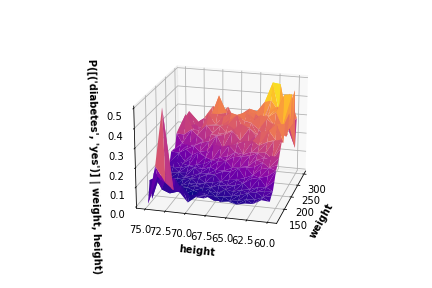

In [30]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['weight', 'height'], controlFor=['weight'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',), ('bmi',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  10
Viz.show: Controlling for  ['weight']
enhance =  False
nTests =  540
Test Time =  254.912


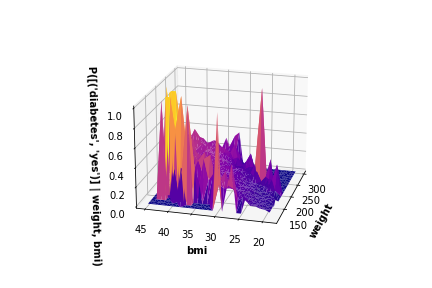

In [31]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['weight', 'bmi'], controlFor=['weight'], gtype='pdf', power=10)

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['weight']
enhance =  False
nTests =  160
Test Time =  73.082


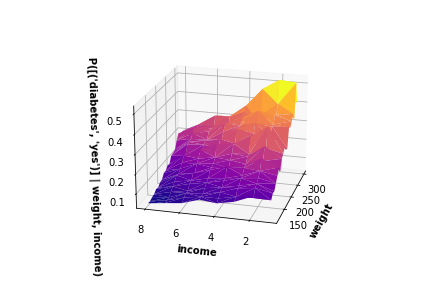

In [32]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['weight', 'income'], controlFor=['weight'], gtype='pdf')

In [33]:
for i in ps.getValues('employment'):
    print(i, ",", ps.E(['weight'], [('employment', i)]), ps.E(['weight'], [('employment', i), ('diabetes', 'yes')]))

1-employed , 187.06736487511276 208.7165074011617
2-self-employed , 185.0099411328993 203.29967875172096
3-outofwork , 184.05571976605245 205.2226296490309
4-homemaker , 165.27139087825103 179.937802349689
5-student , 166.86993091018323 197.48768472906403
6-retired , 177.58315693982462 194.74468966333353
7-unableToWork , 192.74500273406647 210.81385979049153


### observations:

* Conditionalized on weight, 'retired' people and 'unable to work' people, shows positive effect on the probability of diabetes.

* no physical activity has increases the risk of diabetes, when conditionalized on weight.

* If the weight increases for a particular age, the probability of diabetes also increases. And also if a person is having constant weight, the risk of diabetes increases as the age progresses.

* If the height of the person is low (<65), as the weight increases the probability of diabetes escalates quickly. This indicates positive corelation between height and weight. This also explains higher risk of diabetes for extremely obese people.

* Conditionalized on weight, it is difficult deduce relation from the plot diabetes=yes|bmi, weight. People with the weight over 200 pounds, does not seems to have their BMI under 30. In other words, they are not under 'normal' BMI conditions.

* The rate of increase in the probability of diabetes as the weight increases, is lesser for people with higher income than the poeple with lower income.

* The negative corelation between the income and the diabetes can be observed. As income increases, the probability of diabetes decreases. 

* Overweight people with low income have the highest probability of diabetes among different incomes and weights.

## Conditionalize on BMI

In [34]:
bmi_table = []

u = round(ps.P(target, ['bmi']), 2) #var1
for i in ['employment', 'physicalactivity', 'bmicat']:
    for j in ps.getValues(i):
        v = round(ps.P(target, [(i, j)]), 2) #var2
        w = round(ps.P(target, ['bmi', (i, j)]), 2) #var1, var2
        bmi_table.append(['bmi', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_bmi = pd.DataFrame(bmi_table, columns = ['bmi', 'var2', 'var2Val', 'P(db=yes|bmi)', 'P(db=yes|var2)', 'P(db=yes|bmi,var2)', 'P(db=yes)', 'diff:db(bmi)-dby', 'diff:db(var2)-dby', 'diff:db(bmi,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_bmi

bmi              var2            var2Val  P(db=yes|bmi)  P(db=yes|var2)  \
0   bmi        employment         1-employed           0.14            0.09   
1   bmi        employment    2-self-employed           0.14            0.08   
2   bmi        employment        3-outofwork           0.14            0.12   
3   bmi        employment        4-homemaker           0.14            0.14   
4   bmi        employment          5-student           0.14            0.03   
5   bmi        employment          6-retired           0.14            0.21   
6   bmi        employment     7-unableToWork           0.14            0.30   
7   bmi  physicalactivity                 no           0.14            0.23   
8   bmi  physicalactivity                yes           0.14            0.11   
9   bmi            bmicat      1-underweight           0.14            0.06   
10  bmi            bmicat           2-normal           0.14            0.06   
11  bmi            bmicat       3-overweight           0.14            0.11   
12  bmi            bmicat            4-obese           0.14            0.20   
13  bmi            bmicat  5-extremely obese           0.14            0.30   

    P(db=yes|bmi,var2)  P(db=yes)  diff:db(bmi)-dby  diff:db(var2)-dby  \
0                 0.08       0.14               0.0              -0.05   
1                 0.09       0.14               0.0              -0.06   
2                 0.12       0.14               0.0              -0.02   
3                 0.14       0.14               0.0               0.00   
4                 0.04       0.14               0.0              -0.11   
5                 0.22       0.14               0.0               0.07   
6                 0.28       0.14               0.0               0.16   
7                 0.21       0.14               0.0               0.09   
8                 0.11       0.14               0.0              -0.03   
9                 0.02       0.14               0.0              -0.08   
10                0.02       0.14               0.0              -0.08   
11                0.08       0.14               0.0              -0.03   
12                0.14       0.14               0.0               0.06   
13                0.20       0.14               0.0               0.16   

    diff:db(bmi,var2) - dby  diff:db(var1,var2)-db(var1)  \
0                     -0.06                        -0.06   
1                     -0.05                        -0.05   
2                     -0.02                        -0.02   
3                      0.00                         0.00   
4                     -0.10                        -0.10   
5                      0.08                         0.08   
6                      0.14                         0.14   
7                      0.07                         0.07   
8                     -0.03                        -0.03   
9                     -0.12                        -0.12   
10                    -0.12                        -0.12   
11                    -0.06                        -0.06   
12                     0.00                         0.00   
13                     0.06                         0.06   

    diff:db(var1,var2)-db(var2)  
0                         -0.01  
1                          0.01  
2                          0.00  
3                          0.00  
4                          0.01  
5                          0.01  
6                         -0.02  
7                         -0.02  
8                          0.00  
9                         -0.04  
10                        -0.04  
11                        -0.03  
12                        -0.06  
13                        -0.10

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',), ('age',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['bmi']
enhance =  False
nTests =  837
Test Time =  360.566


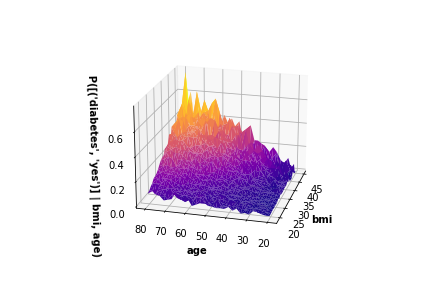

In [35]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['bmi', 'age'], controlFor=['bmi'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',), ('height',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['bmi']
enhance =  False
nTests =  432
Test Time =  191.171


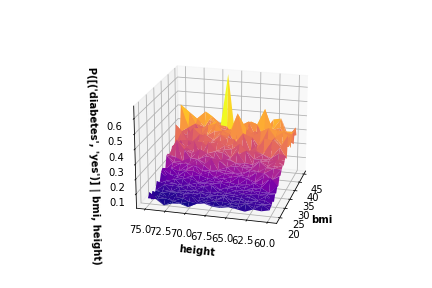

In [36]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['bmi', 'height'], controlFor=['bmi'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',), ('weight',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['bmi']
enhance =  False
nTests =  540
Test Time =  239.46


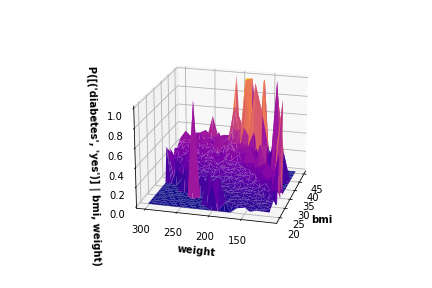

In [37]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['bmi', 'weight'], controlFor=['bmi'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['bmi']
enhance =  False
nTests =  216
Test Time =  96.841


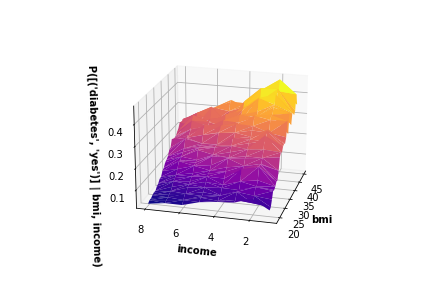

In [38]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['bmi', 'income'], controlFor=['bmi'], gtype='pdf')

### Observations:

* 'Retired' and 'unable to work' has increased chance of diabetes, when conditionlized on bmi. For surpise, 'homemaker' have zero effect on diabetes when conditionalized on bmi.

* no physical activiy has 6% increase in the risk of diabetes.

* surprisingly, conditionalized on income, 'extremely obese' and 'obese' people have showed decreased risk of diabetes.


* If the bmi increases for a particular age, the probability of diabetes also increases. And also if a person is having constant bmi, the risk of diabetes increases as the age progresses.

* The effect of increase in height, on diabetes is not significant.

* Conditionalized on bmi, it is difficult deduce relation from the plot diabetes=yes|bmi, weight. People with the weight over 200 pounds, does not seems to have their BMI under 30. In other words, they are not under 'normal' BMI conditions.

* The negative corelation between the income and the diabetes can be observed. As income increases, the probability of diabetes decreases. 

* Overweight people with the low income have the highest probability of diabetes among different income and weights.

* Underweight people with higher income have the lowest probability of diabetes among different income and weights.

* For higher BMI, the negative correlation between diabetes and income is more significant than that for lower bmis. In other words, for higher bmi, the rate of increase in the probability of diabetes as income decreases is more, and for lower incomes, the rate is less.

* As bmi increased, the probability of diabetes increased. This has been observed from all the plots from conditionalization of bmi.


## Conditionalized on income

In [39]:
income_table = []

u = round(ps.P(target, ['income']), 2) #var1
for i in ['employment', 'physicalactivity', 'bmicat']:
    for j in ps.getValues(i):
        v = round(ps.P(target, [(i, j)]), 2) #var2
        w = round(ps.P(target, ['income', (i, j)]), 2) #var1, var2
        income_table.append(['income', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_income = pd.DataFrame(income_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_income

var1              var2            var2Val  P(db=yes|var1)  \
0   income        employment         1-employed            0.14   
1   income        employment    2-self-employed            0.14   
2   income        employment        3-outofwork            0.14   
3   income        employment        4-homemaker            0.14   
4   income        employment          5-student            0.14   
5   income        employment          6-retired            0.14   
6   income        employment     7-unableToWork            0.14   
7   income  physicalactivity                 no            0.14   
8   income  physicalactivity                yes            0.14   
9   income            bmicat      1-underweight            0.14   
10  income            bmicat           2-normal            0.14   
11  income            bmicat       3-overweight            0.14   
12  income            bmicat            4-obese            0.14   
13  income            bmicat  5-extremely obese            0.14   

    P(db=yes|var2)  P(db=yes|var1,var2)  P(db=yes)  diff:db(var1)-dby  \
0             0.09                 0.09       0.14                0.0   
1             0.08                 0.09       0.14                0.0   
2             0.12                 0.11       0.14                0.0   
3             0.14                 0.13       0.14                0.0   
4             0.03                 0.03       0.14                0.0   
5             0.21                 0.21       0.14                0.0   
6             0.30                 0.28       0.14                0.0   
7             0.23                 0.22       0.14                0.0   
8             0.11                 0.11       0.14                0.0   
9             0.06                 0.06       0.14                0.0   
10            0.06                 0.06       0.14                0.0   
11            0.11                 0.12       0.14                0.0   
12            0.20                 0.20       0.14                0.0   
13            0.30                 0.29       0.14                0.0   

    diff:db(var2)-dby  diff:db(var1,var2) - dby  diff:db(var1,var2)-db(var1)  \
0               -0.05                     -0.05                        -0.05   
1               -0.06                     -0.05                        -0.05   
2               -0.02                     -0.03                        -0.03   
3                0.00                     -0.01                        -0.01   
4               -0.11                     -0.11                        -0.11   
5                0.07                      0.07                         0.07   
6                0.16                      0.14                         0.14   
7                0.09                      0.08                         0.08   
8               -0.03                     -0.03                        -0.03   
9               -0.08                     -0.08                        -0.08   
10              -0.08                     -0.08                        -0.08   
11              -0.03                     -0.02                        -0.02   
12               0.06                      0.06                         0.06   
13               0.16                      0.15                         0.15   

    diff:db(var1,var2)-db(var2)  
0                          0.00  
1                          0.01  
2                         -0.01  
3                         -0.01  
4                          0.00  
5                          0.00  
6                         -0.02  
7                         -0.01  
8                          0.00  
9                          0.00  
10                         0.00  
11                         0.01  
12                         0.00  
13                        -0.01

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',), ('age',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['income']
enhance =  False
nTests =  248
Test Time =  119.684


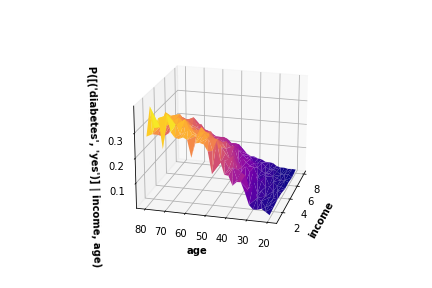

In [40]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=[('income'), ('age')], controlFor=['income'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',), ('height',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['income']
enhance =  False
nTests =  128
Test Time =  64.504


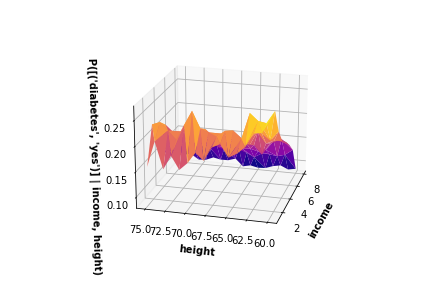

In [41]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=[('income'), ('height')], controlFor=['income'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',), ('weight',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['income']
enhance =  False
nTests =  160
Test Time =  77.585


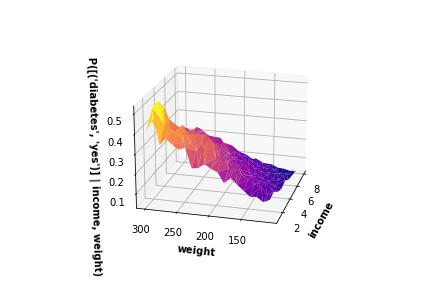

In [42]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=[('income'), ('weight')], controlFor=['income'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',), ('bmi',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['income']
enhance =  False
nTests =  216
Test Time =  106.388


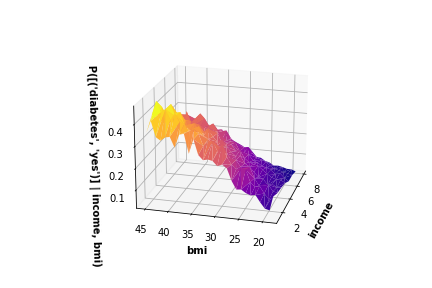

In [43]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=[('income'), ('bmi')], controlFor=['income'], gtype='pdf')

### Observations:

* 'Retired' and 'unable to work' has increased chance of diabetes, when conditionlized on income.

* no physical activiy has 7% increase in risk of diabetes.

* Conditionalized on income, 'extremely obese' and 'obese' people have increased risk of diabetes.

* As the age increases, the probability of diabetes increases, with decresing trend on increasing income.

* The effect of increase in height, on diabetes is not significant. A steep downward curve can be observed from income 2 to income 1, which is not observed in other plots.

* As weight increased, the probability of diabetes also increased.

* For higher income, the rate of increase in the probability of diabetes as BMI increases is low, and for lower incomes, the rate is higher.

* As income increased, the probability of diabetes decreased. This has been observed from all the plots, conditionalized on income.


# Step 6: Causal Model from above analysis

Exogenous variables : Age, Gender

Target Variable : Diabetes

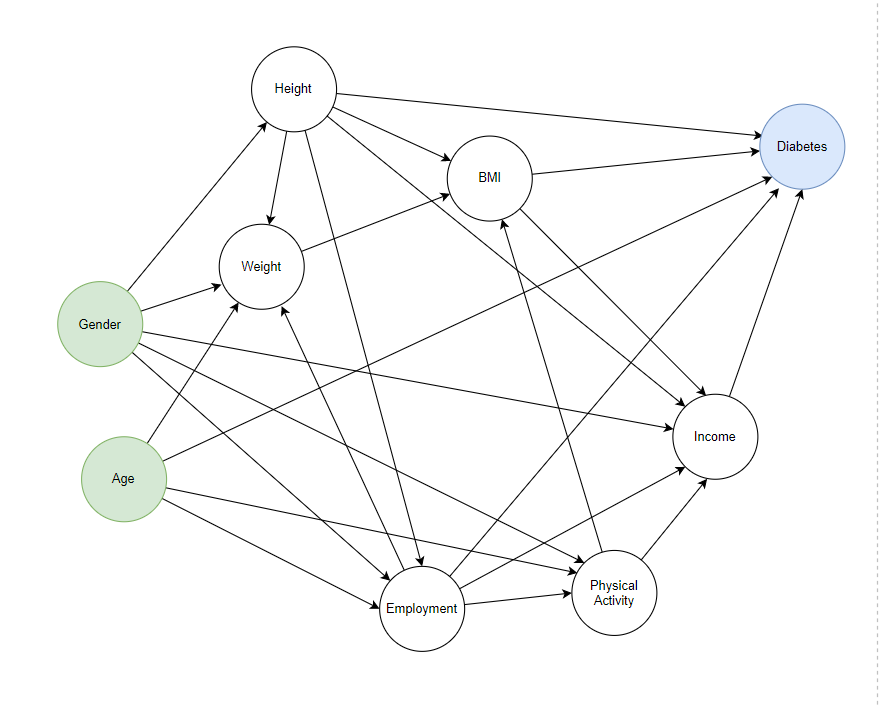

In [469]:
from IPython.display import Image
Image("imgs/dbCausalModel1analysis.png")

# Step 7: Causal model using testDirection & Dependency tests

In [439]:
ps.testDirection('gender', 'diabetes')

-1.4972002511458356e-06

In [440]:
print(ps.dependence('age', 'income', givenSpecs=['employment', 'weight', 'bmi', 'diabetes', 'height','physicalactivity']))
print(ps.isIndependent('age', 'income', givenSpecs=['employment', 'weight','bmi', 'diabetes', 'height','physicalactivity']))

1.0
False


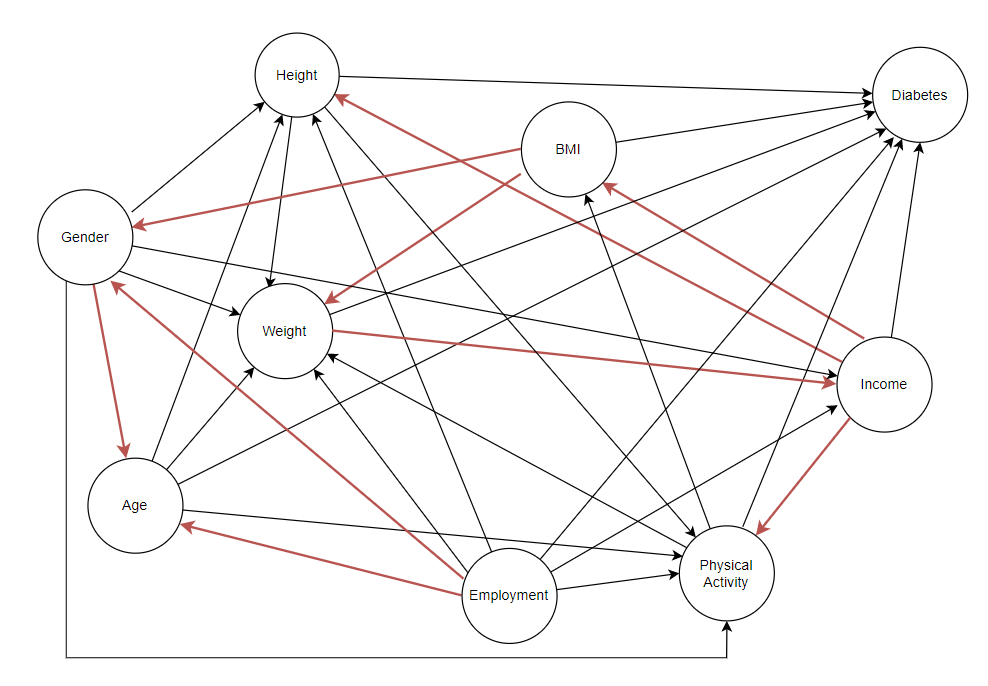

In [468]:
from IPython.display import Image
Image("imgs/dbCausalModel2testDirection.png")

# Step 8: Model Reduction

In [451]:
goodVars = ['age', 'gender', 'height', 'weight', 'bmi', 'income', 'diabetes', 'employment', 'physicalactivity']
for i in goodVars:
    print(ps.isIndependent('age', 'weight', givenSpecs=[i]))

False
False
False
True
False
False
False
False
False


In [3]:
# remove arrow from weight to diabetes
print(ps.isIndependent('weight', 'diabetes', givenSpecs=['bmi', 'height'])) 

True


In [7]:
print(ps.isIndependent('weight', 'diabetes', givenSpecs=['height'], sensitivity=4)) 

False
